In [ ]:
# FS plots of stripe imagery and its Fourier Transforms, 2015-10-20.

%matplotlib notebook

import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from scipy import misc
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq

# This is confusing but for some reason these methods are in NumPy only, not SciPy
from numpy.fft import rfft2, irfft2, rfftfreq

from scipy.io import wavfile

In [ ]:
# This looks like a horrible way of setting up the plots.
# Probably should have used .subplots() and related methods 
# to avoid duplication of the axis control instructions ...
# e.g. figSPFRsparr, SPFRsparr = plt.subplots(2, 3, sharex=True, sharey=True)

fig_sp = plt.figure()
fig_spfr = plt.figure()

ax_sp = fig_sp.add_subplot(1,1,1)    
ax_spfr = fig_spfr.add_subplot(1,1,1)

ax_sp.axes.get_xaxis().set_ticks([])
ax_sp.axes.get_yaxis().set_ticks([])

ax_sp.set_xlabel('Spatial dimension $X$')
ax_sp.set_ylabel('Spatial dimension $Y$')

ax_spfr.axes.get_xaxis().set_ticks([])
ax_spfr.axes.get_yaxis().set_ticks([])

ax_spfr.set_xlabel('Spatial Frequency $f_X$')
ax_spfr.set_ylabel('Spatial Frequency $f_Y$')

ax1 = fig_spfr.add_subplot(2,3,1)
ax2 = fig_spfr.add_subplot(2,3,2)
ax3 = fig_spfr.add_subplot(2,3,3)

ax21 = fig_spfr.add_subplot(2,3,4)
ax22 = fig_spfr.add_subplot(2,3,5)
ax23 = fig_spfr.add_subplot(2,3,6)

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax3.axes.get_xaxis().set_ticks([])
ax3.axes.get_yaxis().set_ticks([])
ax21.axes.get_xaxis().set_ticks([])
ax21.axes.get_yaxis().set_ticks([])
ax22.axes.get_xaxis().set_ticks([])
ax22.axes.get_yaxis().set_ticks([])
ax23.axes.get_xaxis().set_ticks([])
ax23.axes.get_yaxis().set_ticks([])

ax4 = fig_sp.add_subplot(2,3,1)
ax5 = fig_sp.add_subplot(2,3,2)
ax6 = fig_sp.add_subplot(2,3,3)
ax24 = fig_sp.add_subplot(2,3,4)
ax25 = fig_sp.add_subplot(2,3,5)
ax26 = fig_sp.add_subplot(2,3,6)

ax4.axes.get_xaxis().set_ticks([])
ax4.axes.get_yaxis().set_ticks([])
ax6.axes.get_xaxis().set_ticks([])
ax6.axes.get_yaxis().set_ticks([])
ax24.axes.get_xaxis().set_ticks([])
ax24.axes.get_yaxis().set_ticks([])
ax25.axes.get_xaxis().set_ticks([])
ax25.axes.get_yaxis().set_ticks([])
ax26.axes.get_xaxis().set_ticks([])
ax26.axes.get_yaxis().set_ticks([])


In [ ]:
# Make stripe images the easy way by cheating! Take the inverse Fourier Transform of a single point 
# at various coordinates in the Spatial Frequency domain.

# An complex array for the frequency domain with N frequencies in each dimension.
N = 25 
xf = np.zeros((N,N),dtype=complex)


# Set any one of the frequencies to be non-zero.
xf[0, 5] = 1 + 0j # For a cosine which starts high 
#or use 0 + 1j to for a sine which starts low

xf[0, N-5] = 1 - 0j # The negative freq associated with the above.
# Not needed here because we want real numbers-only imagery. 
# Just doing it to be consistent with actual FT data

# Look at a picture of the point in the frequency domain
ax1.imshow(np.abs(xf), cmap=cm.Greys_r)
# Convert from frequency domain to spatial domain
Z = ifft2(xf)

# print(Z) # Just checking that the imaginary parts are all zero 
# since there should be no sine component in the image.

# Look at the real part only. 
ax4.imshow(np.real(Z), cmap=cm.Greys_r)

In [ ]:
xf = np.zeros((N, N),dtype=complex)

xf[5, 0] = 1 + 0j
xf[N-5,0] = 1 + 0j

Z = ifft2(xf)
ax2.imshow(np.abs(xf), cmap=cm.Greys_r)
ax5.imshow(np.real(Z), cmap=cm.Greys_r)

In [ ]:
xf = np.zeros((N,N),dtype=complex)

xf[0, 5] = 1 + 0j
xf[0, N-5] = 1 - 0j

xf[5, 0] = 1 + 0j
xf[N-5, 0] = 1 - 0j

Z = ifft2(xf)
ax3.imshow(np.abs(xf), cmap=cm.Greys_r)
ax6.imshow(np.real(Z), cmap=cm.Greys_r)

In [ ]:
xf = np.zeros((N, N),dtype=complex)

xf[5, 5] = 1 + 0j
xf[N-5, N-5] = 1 - 0j

Z = ifft2(xf)
ax21.imshow(np.abs(xf), cmap=cm.Greys_r)
ax24.imshow(np.real(Z), cmap=cm.Greys_r)

In [ ]:
xf = np.zeros((N, N),dtype=complex)

xf[N-5, 5] = 1 + 0j
xf[5, N-5] = 1 - 0j

Z = ifft2(xf)
ax22.imshow(np.abs(xf), cmap=cm.Greys_r)
ax25.imshow(np.real(Z), cmap=cm.Greys_r)

In [ ]:
xf = np.zeros((N, N),dtype=complex)

xf[5, 5] = 1 + 0j
xf[N-5, N-5] = 1 - 0j

xf[N-5, 5] = 1 + 0j
xf[5, N-5] = 1 - 0j

Z = ifft2(xf)

ax23.imshow(np.abs(xf), cmap=cm.Greys_r)
ax26.imshow(np.real(Z), cmap=cm.Greys_r)

In [ ]:
#fig_sp.savefig('Spatial-dimensions-stripes.png', dpi=600)
#fig_spfr.savefig('Spatial-frequencies-stripes.png', dpi=600)

In [ ]:
img = mpimg.imread('StripedCat.png')
print(img.shape)

spplot = plt.figure()
axsp = spplot.add_subplot(1,1,1)
axsp.imshow(img, cmap=cm.Greys_r)

axsp.set_xlabel('Spatial dimension $X$')
axsp.set_ylabel('Spatial dimension $Y$')

# spplot.savefig('StripedCat-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


In [ ]:
# Get the FT 

spfr = fft2(img)

frequencies_fft_rows = fftfreq(img.shape[0],1/img.shape[0])                                 
frequencies_fft_cols = fftfreq(img.shape[1],1/img.shape[1])

#print(frequencies_fft_rows) # These look correct
#print(frequencies_fft_cols)

spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)

axspfr.set_xlabel('Spatial Frequency $f_X$')
axspfr.set_ylabel('Spatial Frequency $f_Y$')

# axspfr.set_xticks(frequencies_fft_rows) # Can't get ticks working. Giving up!
# axspfr.set_yticks(frequencies_fft_cols)

ps_spfr = np.abs(spfr)**2 # Get the power spectrum

# log scale is used to scale down bigger number disproportionately to smaller ones
axspfr.imshow(np.log(ps_spfr), cmap=cm.Greys_r) 

# spfrplot.savefig('StripedCatFFT-100PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


In [ ]:
iimg = ifft2(spfr)

ispplot = plt.figure()
axisp = ispplot.add_subplot(1,1,1)

axisp.imshow(np.abs(iimg), cmap=cm.Greys_r)

axisp.set_xlabel('Spatial dimension $X$')
axisp.set_ylabel('Spatial dimension $Y$')

# ispplot.savefig('StripedCatIFFT-100PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

In [ ]:
imrows, imcols = img.shape

spfr = fft2(img)

spfr[imrows//5:,imcols//5:] = \
    np.ones((imrows-imrows//5,imcols-imcols//5)) * 1E-20

spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)

ps_spfr = np.abs(spfr)**2

axspfr.imshow(np.log10(ps_spfr), cmap=cm.Greys_r)

axspfr.set_xlabel('Spatial frequency $f_X$')
axspfr.set_ylabel('Spatial frequency $f_Y$')

# spfrplot.savefig('StripedCatFFT-32PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


In [ ]:
iimg = ifft2(spfr)

ispplot = plt.figure()
axisp = ispplot.add_subplot(1,1,1)

axisp.imshow(np.real(iimg), cmap=cm.Greys_r)

axisp.set_xlabel('Spatial dimension $X$')
axisp.set_ylabel('Spatial dimension $Y$')

# ispplot.savefig('StripedCatIFFT-32PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

In [ ]:
# Make a new image comprising lower spatial frequencies only and that has lower 
# spatial resolution (i.e. fewer pixels) which should be achieved by applying the
# inverse Fourier Transform to a smaller sized frequency space.

NewHalfSideLength = 100

imrows, imcols = img.shape

mid_rows = imrows//2 
mid_cols = imcols//2

spfr = fft2(img)
print(spfr.shape)

smaller_spfr_shift = fftshift(spfr)
smaller_spfr_shift = smaller_spfr_shift[mid_rows-NewHalfSideLength:mid_rows+NewHalfSideLength, 
                                        mid_cols-NewHalfSideLength:mid_cols+NewHalfSideLength]
print(smaller_spfr_shift.shape)

ps_smaller_spfr_shift = np.abs(smaller_spfr_shift)**2

smaller_spfr = ifftshift(smaller_spfr_shift)
ps_smaller_spfr = np.abs(smaller_spfr)**2


spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)
axspfr.set_xlabel('Spatial frequency $f_X$')
axspfr.set_ylabel('Spatial frequency $f_Y$')

axspfr.imshow(np.log(ps_smaller_spfr_shift), cmap=cm.Greys_r)

spfrplot2 = plt.figure()
axspfr2 = spfrplot2.add_subplot(1,1,1)
axspfr2.set_xlabel('Spatial frequency $f_X$')
axspfr2.set_ylabel('Spatial frequency $f_Y$')

axspfr2.imshow(np.log(ps_smaller_spfr), cmap=cm.Greys_r)


# spfrplot.savefig('StripedCatFFT-32PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


In [ ]:
iimg = ifft2(smaller_spfr)

ispplot = plt.figure()
axisp = ispplot.add_subplot(1,1,1)

axisp.imshow(np.abs(iimg), cmap=cm.Greys_r)

axisp.set_xlabel('Spatial dimension $X$')
axisp.set_ylabel('Spatial dimension $Y$')

# ispplot.savefig('StripedCatIFFT-32PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

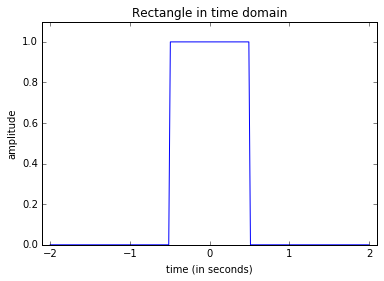

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


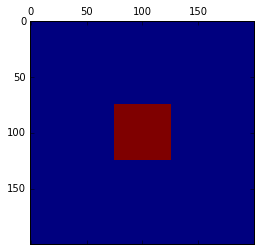

/home/jhribar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:76: RuntimeWarning: divide by zero encountered in log


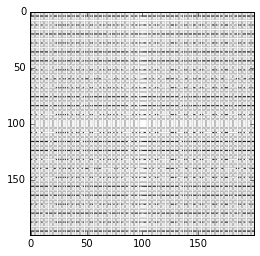

In [1]:
'''
Use a SciPy 2-D DFT to compute the power spectra of discrete versions of the following 2-D functions 
which are seperable in rectangular coordinates into their 1-D equivalents. Plot them all nicely in a table
'''
%matplotlib inline
import numpy as np
import pylab
import matplotlib.pyplot as plt
import math
from scipy import misc
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq
# This is confusing but for some reason these methods are in NumPy only, not SciPy
from numpy.fft import rfft2, irfft2, rfftfreq
import matplotlib.cm as cm
# Rectangle:
start_time = -2
stop_time = 2
time_to_plot = 4 # seconds
sample_rate = 50 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot #+ 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

rect = np.linspace(0,1,total_number_of_sample)
for i in range(len(t)):
    if((t[i] > -0.5) & (t[i] < 0.5)):
        rect[i] = 1
    elif((t[i] == 0.5) &(t[i] == -0.5)):
        rect[i] = 0.5
    else:
        rect[i] = 0

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Rectangle in time domain')
plt.axis([-2.1, 2.1, 0,1.1])
plt.plot(t, rect)
plt.show()



rect1 = np.asmatrix(rect)
rect2D=np.dot(np.transpose(rect1),rect1)

print(rect2D)
plt.matshow(rect2D)
plt.show()

#rect2D=np.transpose(rect) * rect
#rect2D= np.outer(rect, rect)
#setup_graph(x_label='x', y_label='y', title='Multiplied Rectangle')
#New= np.transpose(rect) * rect# np.dot(rect, rect)
#plt.matshow(rect2D)
#plt.plot(rect2D)
#plt.show()


# Get the FT 

rect2Dft = fftshift(fft2(rect2D))

#rect2Dft.imshow()

ps_rect2Dft = np.abs(rect2Dft)**2

#print(ps_rect2Dft)
ps_rect2DftP = plt.figure()
axirect2DftP = ps_rect2DftP.add_subplot(1,1,1)
axirect2DftP.imshow(np.log(ps_rect2Dft), cmap=cm.Greys_r)


#.plot(rect2Dft)
#plt.show()

#frequencies_fft_rows = fftfreq(rect2D.shape[0],1/rect2D.shape[0])                                 
#frequencies_fft_cols = fftfreq(rect2D.shape[1],1/rect2D.shape[1])

#print(frequencies_fft_rows) # These look correct
#print(frequencies_fft_cols)

#rect2Dplot = plt.figure()
#axsrect2D =rect2Dplot.add_subplot(1,1,1)

#axsrect2D.set_xlabel('Spatial Frequency $f_X$')
#axsrect2D.set_ylabel('Spatial Frequency $f_Y$')


#ps_rect2D = np.abs(rect2D)**2 # Get the power spectrum

# log scale is used to scale down bigger number disproportionately to smaller ones
#axsrect2D.imshow(np.log(ps_rect2D), cmap=cm.Greys_r) 




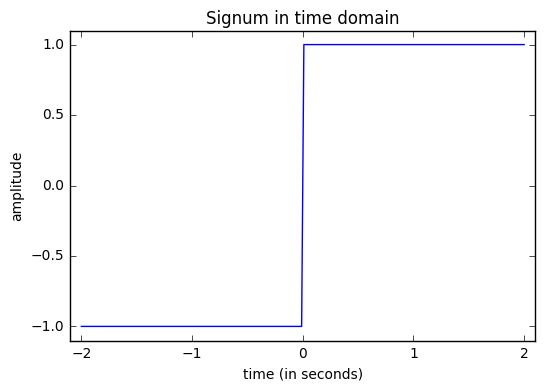

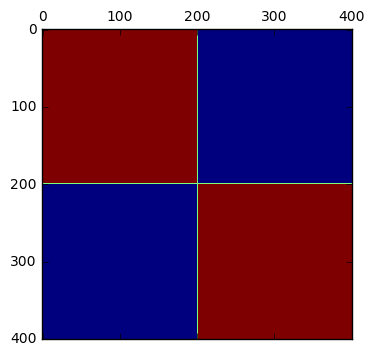

/home/jhribar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log


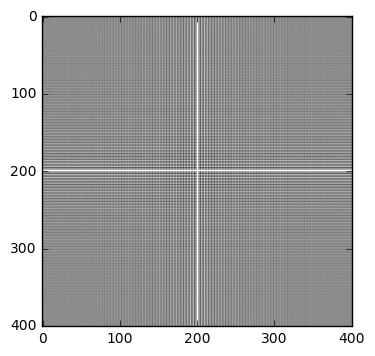

In [6]:
# Signum:
start_time = -2
stop_time = 2
time_to_plot = 4 # seconds
sample_rate = 100 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot + 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace
signum = np.copysign(1,t) # Define coysign is closest function in python to Signum array
signum[int((sample_rate * time_to_plot)/2)] = 0 #add zero because copysign turns zero to 1

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Signum in time domain')
plt.axis([-2.1, 2.1, -1.1,1.1])
plt.plot(t, signum)
plt.show()

signum1 = np.asmatrix(signum)
signum2D=np.dot(np.transpose(signum1),signum1)

plt.matshow(signum2D)
plt.show()

# Get the FT 

signum2Dft = fftshift(fft2(signum2D))

#rect2Dft.imshow()

ps_signum2Dft = np.abs(signum2Dft)**2

#print(ps_signum2Dft)
ps_signum2DftP = plt.figure()
axisignum2DftP = ps_signum2DftP.add_subplot(1,1,1)
axisignum2DftP.imshow(np.log(ps_signum2Dft), cmap=cm.Greys_r)

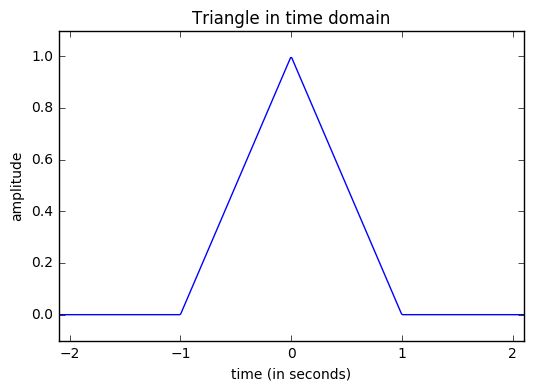

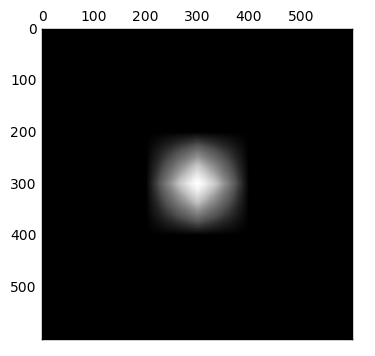

/home/jhribar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log


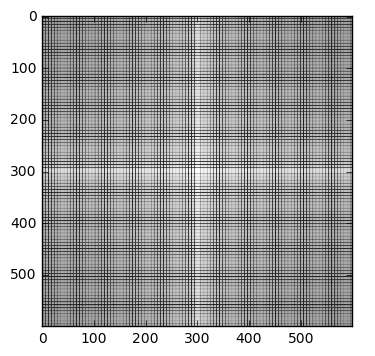

In [7]:
# Triangle:
start_time = -3
stop_time = 3
time_to_plot = 6 # seconds
sample_rate = 100 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot #+ 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace
triangle= np.linspace(0,1,total_number_of_sample)
for i in range(len(t)):
    if((t[i] > -1.0) & (t[i] < 1.0)):
        triangle[i] = 1 - abs(t[i])
    else:
        triangle[i] = 0

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Triangle in time domain')
plt.axis([-2.1, 2.1, -0.1,1.1])
plt.plot(t, triangle)
plt.show()

triangle1 = np.asmatrix(triangle)
triangle2D=np.dot(np.transpose(triangle1),triangle1)

plt.matshow(triangle2D, cmap=cm.Greys_r)
plt.show()

# Get the FT 

triangle2Dft = fftshift(fft2(triangle2D))


ps_triangle2Dft = np.abs(triangle2Dft)**2

#print(ps_signum2Dft)
ps_triangle2DftP = plt.figure()
axitriangle2DftP = ps_triangle2DftP.add_subplot(1,1,1)
axitriangle2DftP.imshow(np.log(ps_triangle2Dft), cmap=cm.Greys_r,)

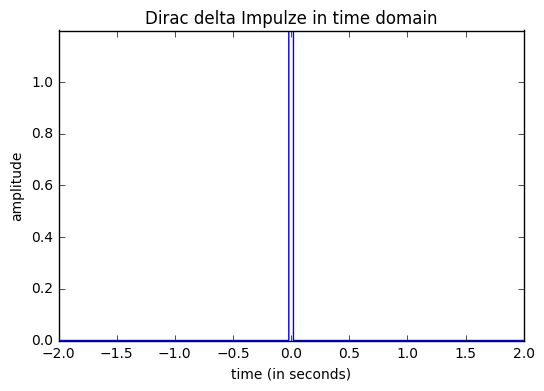

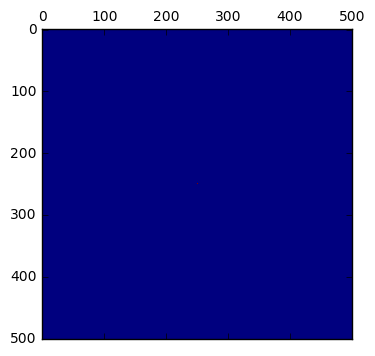

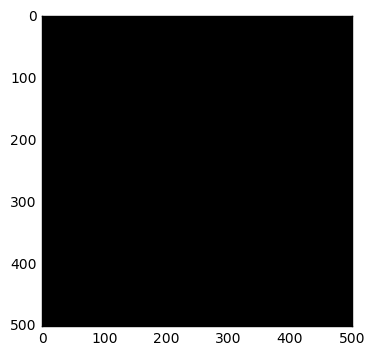

In [9]:
# Impulse/Dirac delta:
start_time = -5
stop_time = 5
time_to_plot = 10 # seconds
sample_rate = 50 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot + 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace
dirac_impulze = np.linspace(0,1,total_number_of_sample)

for i in range(len(t)):
    if(t[i] == 0):
        dirac_impulze[i]  = 1000
    else:
        dirac_impulze [i] = 0
        
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Dirac delta Impulze in time domain')
plt.axis([-2, 2, 0,1.2])
plt.plot(t, dirac_impulze)
plt.show()

#Generate 2D dirac

dirac_impulze1 = np.asmatrix(dirac_impulze)
dirac_impulze2D=np.dot(np.transpose(dirac_impulze1),dirac_impulze1)

plt.matshow(dirac_impulze2D)
plt.show()

# Get the FT 

dirac_impulze2Dft = fftshift(fft2(dirac_impulze2D))


ps_dirac_impulze2Dft = np.abs(dirac_impulze2Dft)**2

#print(ps_signum2Dft)
ps_dirac_impulze2DftP = plt.figure()
axidirac_impulze2DftP = ps_dirac_impulze2DftP.add_subplot(1,1,1)
axidirac_impulze2DftP.imshow(np.log(ps_dirac_impulze2Dft), cmap=cm.Greys_r)


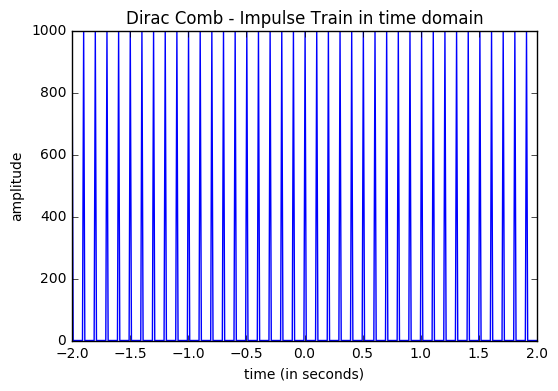

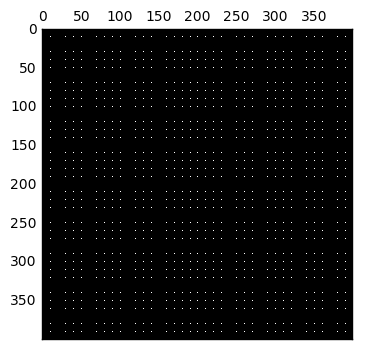

/home/jhribar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log


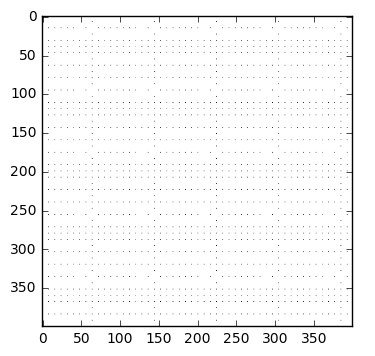

In [12]:
# Combulusion - Dirac delta impul train:
start_time = -2
stop_time = 2
time_to_plot = 4 # seconds
sample_rate = 100 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot #+ 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace
from scipy.special import comb

dirac_comb = np.linspace(0,1,total_number_of_sample)
k = 10 # set time between impulses, everysecond

for i in range(len(t)):
    if (i % k) == 0:
        dirac_comb[i] = 1000
    else:
        dirac_comb[i] = 0


setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Dirac Comb - Impulse Train in time domain')
plt.axis([-2, 2, 0,1000])
plt.plot(t, dirac_comb)
plt.show()

#Generate 2D Comb

dirac_comb1 = np.asmatrix(dirac_comb)
dirac_comb2D=np.dot(np.transpose(dirac_comb1),dirac_comb1)

plt.matshow(dirac_comb2D,cmap=cm.Greys_r)
plt.show()

# Get the FT 

dirac_comb2Dft = fftshift(fft2(dirac_comb2D))


ps_dirac_comb2Dft = np.abs(dirac_comb2Dft)**2

#print(ps_signum2Dft)
ps_dirac_comb2DftP = plt.figure()
axidirac_comb2DftP = ps_dirac_comb2DftP.add_subplot(1,1,1)
axidirac_comb2DftP.imshow(np.log(ps_dirac_comb2Dft), cmap=cm.Greys_r)